In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# - Data Understanding

In [2]:
train = pd.read_csv('train.csv.zip')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv.zip')

In [3]:
print(train.shape)
train.columns

(421570, 5)


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [4]:
print(stores.shape)
stores.columns

(45, 3)


Index(['Store', 'Type', 'Size'], dtype='object')

In [5]:
print(features.shape)
features.columns

(8190, 12)


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [6]:
# Merge all data
Data = train.merge(stores, how='left').merge(features, how='left')

# Creating date-time objects and some extra date-time info
Data['Date'] = pd.to_datetime(Data['Date'])
Data['Year'] = pd.to_datetime(Data['Date']).dt.year
Data['Month'] = pd.to_datetime(Data['Date']).dt.month
Data['Week'] = pd.to_datetime(Data['Date']).dt.week
Data['DayOfTheMonth'] = pd.to_datetime(Data['Date']).dt.day

# sorting data with respect to date
Data = Data.sort_values(by='Date')

In [7]:
print('First 5 Rows Show')
Data.head()

First 5 Rows Show


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheMonth
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,2010,2,5,5
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,2010,2,5,5
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,2010,2,5,5
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,2010,2,5,5


In [8]:
print('Last 5 Rows Show')
Data.tail()

Last 5 Rows Show


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheMonth
379648,40,87,2012-10-26,24638.96,False,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,2012,10,43,26
181170,19,30,2012-10-26,3740.12,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,2012,10,43,26
181313,19,31,2012-10-26,3128.17,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,2012,10,43,26
181599,19,33,2012-10-26,5740.14,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,2012,10,43,26
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,2012,10,43,26


In [9]:
# Describe function is a function that allows analysis between the numerical values contained in the data set. 
# Using this function count, mean, std, min, max, 25%, 50%, 75%.
print('Show Describe\n')
Data.describe()

Show Describe



,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheMonth
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,2010.968591,6.449510,25.826762,15.673131
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.796876,3.243217,14.151887,8.753549
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,2010.000000,1.000000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,2010.000000,4.000000,14.000000,8.000000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,2011.000000,6.000000,26.000000,16.000000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,2012.000000,9.000000,38.000000,23.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,12.000000,52.000000,31.000000


In [10]:
# Look at the number of rows and columns in the dataset
Data.shape

(421570, 20)

In [11]:
# Checking the types of data
Data.dtypes

Store                     int64
Dept                      int64
Date             datetime64[ns]
Weekly_Sales            float64
IsHoliday                  bool
Type                     object
Size                      int64
Temperature             float64
Fuel_Price              float64
MarkDown1               float64
MarkDown2               float64
MarkDown3               float64
MarkDown4               float64
MarkDown5               float64
CPI                     float64
Unemployment            float64
Year                      int64
Month                     int64
Week                      int64
DayOfTheMonth             int64
dtype: object

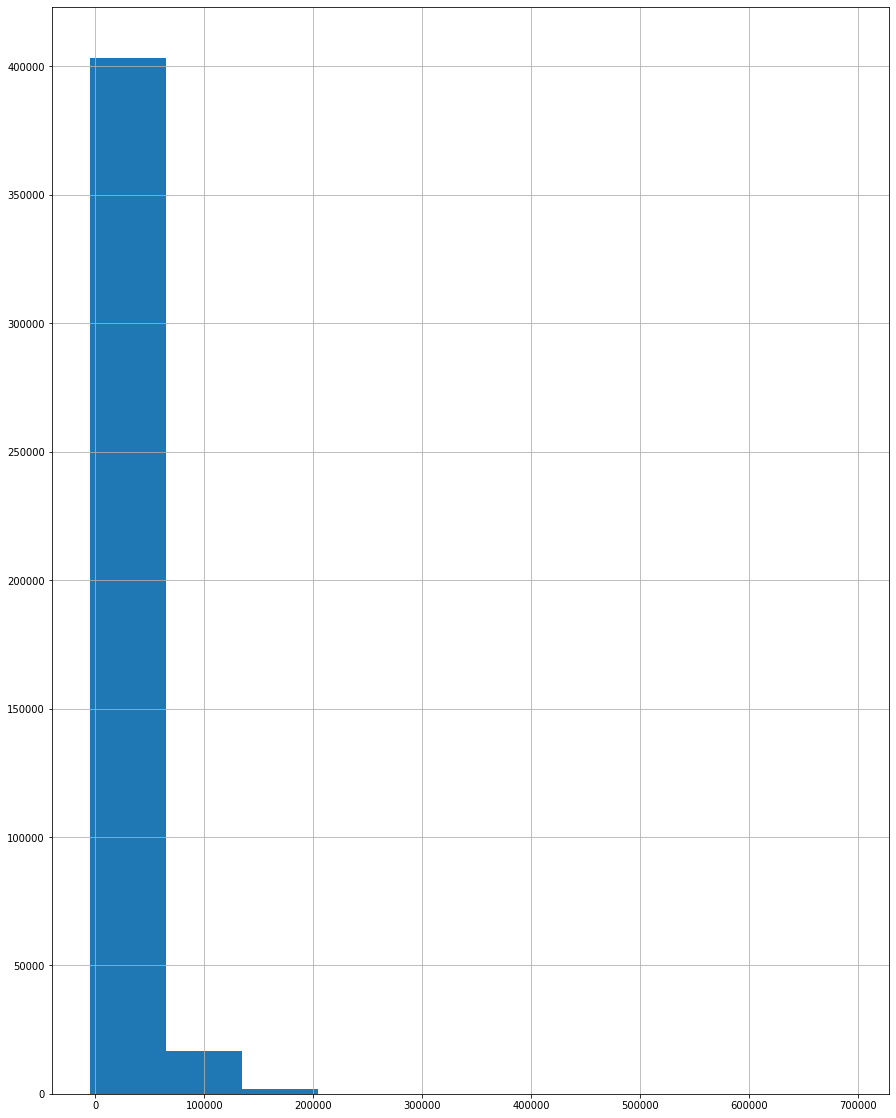

In [12]:
# Plot histogram to check the values distribution for all variables
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
Data['Weekly_Sales'].hist(ax = ax)

# - Business Understanding

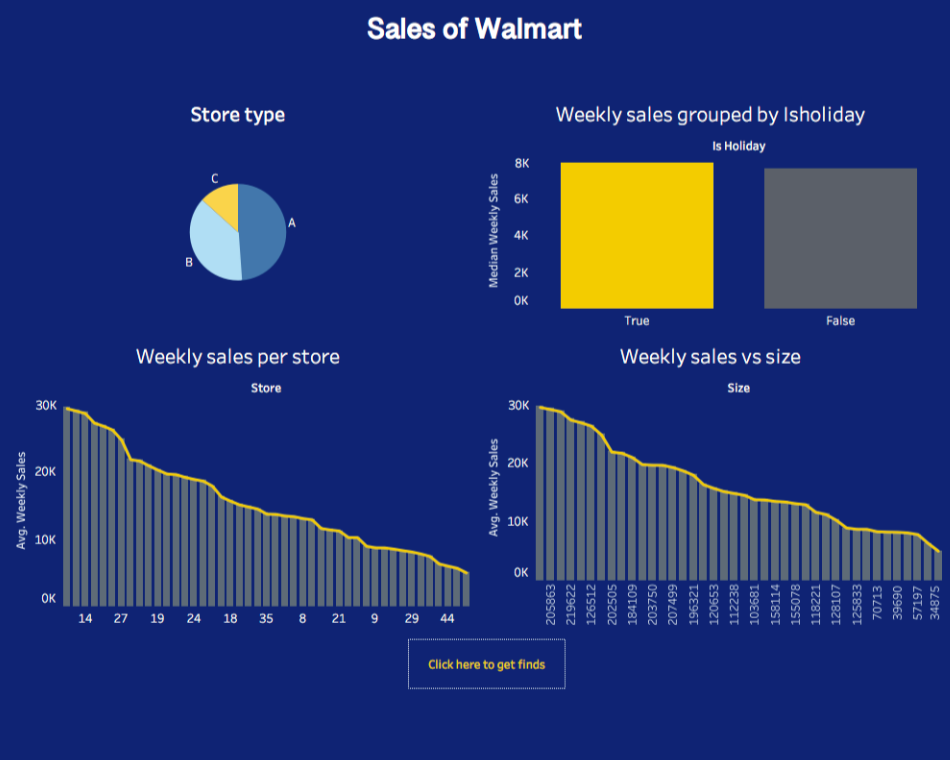

In [13]:
from IPython.display import Image
Image(filename='B dashboard.png') 

# - Prepare Data

In [14]:
Data.isna().sum()

Store                 0
Dept                  0
Date                  0
Weekly_Sales          0
IsHoliday             0
Type                  0
Size                  0
Temperature           0
Fuel_Price            0
MarkDown1        270889
MarkDown2        310322
MarkDown3        284479
MarkDown4        286603
MarkDown5        270138
CPI                   0
Unemployment          0
Year                  0
Month                 0
Week                  0
DayOfTheMonth         0
dtype: int64

In [15]:
Data['CPI'] = Data['CPI'].fillna(Data['CPI'].mean())
Data['Unemployment'] = Data['Unemployment'].fillna(Data['Unemployment'].mean())
Data['MarkDown1'] = Data['MarkDown1'].fillna(0)
Data['MarkDown2'] = Data['MarkDown2'].fillna(0)
Data['MarkDown3'] = Data['MarkDown3'].fillna(0)
Data['MarkDown4'] = Data['MarkDown4'].fillna(0)
Data['MarkDown5'] = Data['MarkDown5'].fillna(0)

In [16]:
Data.isna().sum()

Store            0
Dept             0
Date             0
Weekly_Sales     0
IsHoliday        0
Type             0
Size             0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        0
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI              0
Unemployment     0
Year             0
Month            0
Week             0
DayOfTheMonth    0
dtype: int64

In [17]:
Data.isna().sum()

Store            0
Dept             0
Date             0
Weekly_Sales     0
IsHoliday        0
Type             0
Size             0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        0
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI              0
Unemployment     0
Year             0
Month            0
Week             0
DayOfTheMonth    0
dtype: int64

In [18]:
Data['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [19]:
# Convert categorical data into one-hot-encoding
Type_Cat=pd.get_dummies(Data['Type'])
Data=pd.concat([Data,Type_Cat],axis=1)
Data.drop('Type',axis=1,inplace=True)
Data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheMonth,A,B,C
0,1,1,2010-02-05,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,5,1,0,0
277665,29,5,2010-02-05,15552.08,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,0,1,0
277808,29,6,2010-02-05,3200.22,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,0,1,0
277951,29,7,2010-02-05,10820.05,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,0,1,0
278094,29,8,2010-02-05,20055.64,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,0,1,0


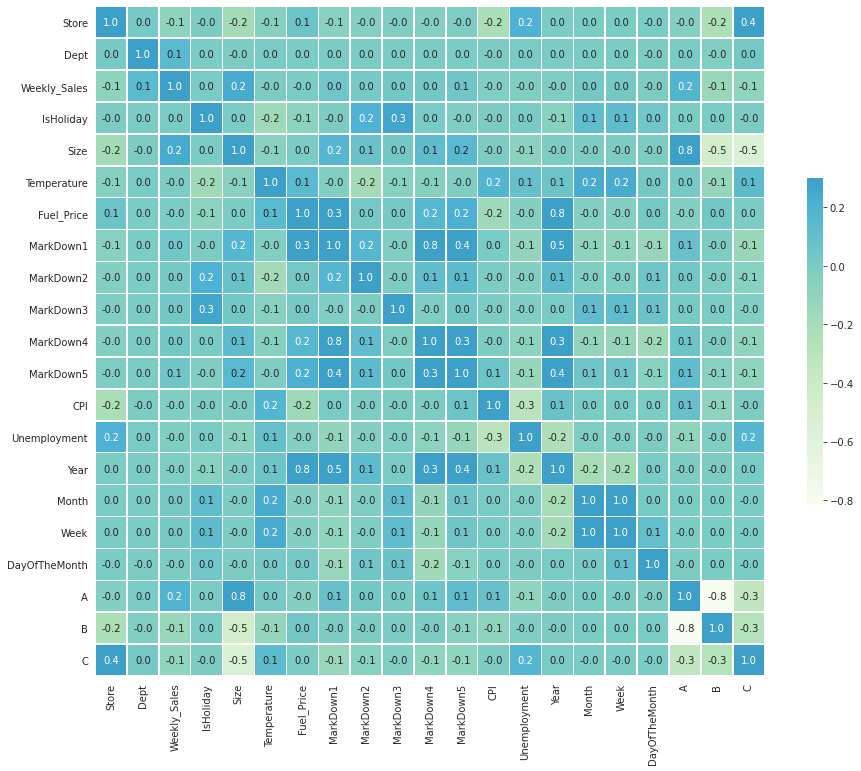

In [20]:
# Plot heatmap to show the correlation between all variables and the target

corr = Data.corr()
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,vmax=.3, center=0,square=True, linewidths=.5, 
                     cbar_kws={"shrink": .4},annot=True,cmap='GnBu',fmt=".1f",annot_kws={'size':10})

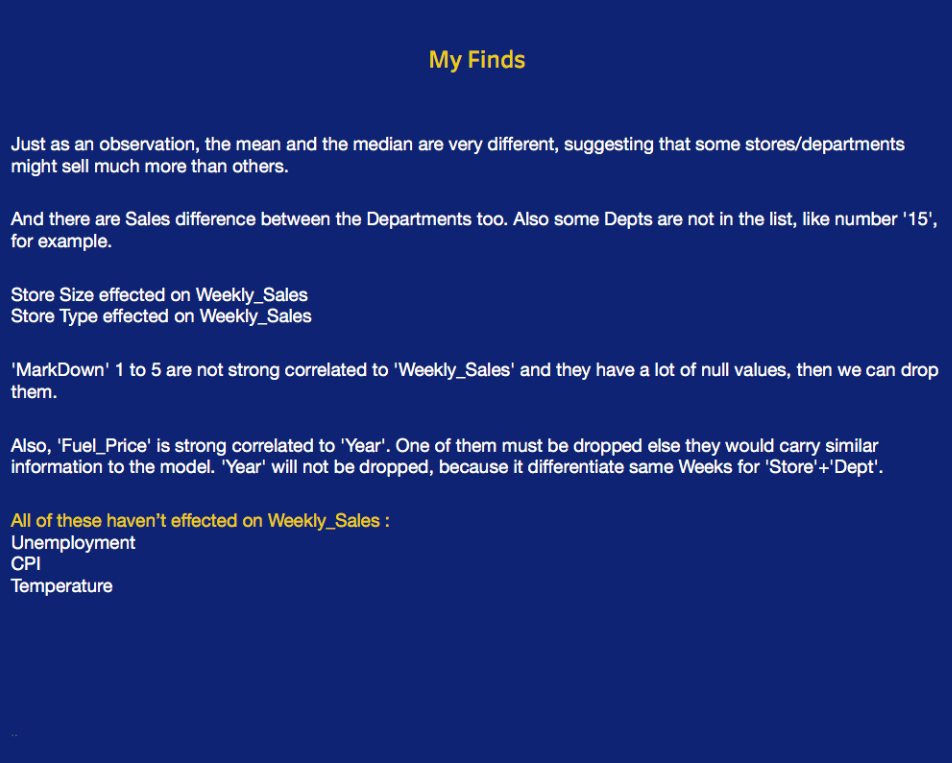

In [21]:
Image(filename='finds.png') 

# - Data Modeling

In [22]:
X=Data.drop(columns=['Weekly_Sales','Date'])
y=Data['Weekly_Sales']

In [23]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=0)

In [24]:
# Build models
Regressors = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor()
}

# - Evaluate the result

In [ ]:
for key, regressor in Regressors.items():
    regressor.fit(X_train, y_train)
    training_score = cross_val_score(regressor, X_train, y_train, cv=5)
    print("Regressors: ", regressor.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Regressors:  LinearRegression Has a training score of 9.0 % accuracy score
Regressors:  DecisionTreeRegressor Has a training score of 96.0 % accuracy score
Regressors:  RandomForestRegressor Has a training score of 97.0 % accuracy score


By : Aljawharah Aldukhayni